<figure style="text-align: center;">
  <img src="_static/intro/title_page.png" style="display: block; margin: 0 auto; width: 100%;">
</figure>

### Gradient Boosting Trees

Michael J. Pyrcz, Professor, The University of Texas at Austin 

[Twitter](https://twitter.com/geostatsguy) | [GitHub](https://github.com/GeostatsGuy) | [Website](http://michaelpyrcz.com) | [GoogleScholar](https://scholar.google.com/citations?user=QVZ20eQAAAAJ&hl=en&oi=ao) | [Book](https://www.amazon.com/Geostatistical-Reservoir-Modeling-Michael-Pyrcz/dp/0199731446) | [YouTube](https://www.youtube.com/channel/UCLqEr-xV-ceHdXXXrTId5ig)  | [Applied Geostats in Python e-book](https://geostatsguy.github.io/GeostatsPyDemos_Book/intro.html) | [LinkedIn](https://www.linkedin.com/in/michael-pyrcz-61a648a1)

Chapter of e-book "Applied Machine Learning in Python: a Hands-on Guide with Code". 

```{admonition} Cite this e-Book as:
:class: remove-from-content-only

Pyrcz, M.J., 2024, *Applied Machine Learning in Python: A Hands-on Guide with Code* [e-book]. Zenodo. doi:10.5281/zenodo.15169138 [![DOI](https://zenodo.org/badge/863274676.svg)](https://doi.org/10.5281/zenodo.15169138) 
```

The workflows in this book and more are available here:

```{admonition} Cite the MachineLearningDemos GitHub Repository as:
:class: remove-from-content-only

Pyrcz, M.J., 2024, *MachineLearningDemos: Python Machine Learning Demonstration Workflows Repository* (0.0.3) [Software]. Zenodo. DOI: 10.5281/zenodo.13835312. GitHub repository: https://github.com/GeostatsGuy/MachineLearningDemos [![DOI](https://zenodo.org/badge/862519860.svg)](https://zenodo.org/doi/10.5281/zenodo.13835312)
```

By Michael J. Pyrcz <br />
&copy; Copyright 2024.

This chapter is a tutorial for / demonstration of **Gradient Boosting Trees**. 

**YouTube Lecture**: check out my lectures on:

* [Introduction to Machine Learning](https://youtu.be/zOUM_AnI1DQ?si=wzWdJ35qJ9n8O6Bl)
* [Decision Tree](https://youtu.be/JUGo1Pu3QT4?si=ebQXv6Yglar0mYWp)
* [Random Forest](https://youtu.be/m5_wk310fho?si=up-mzVPHvniXsYE6)
* [Gradient Boosting](https://youtu.be/___T8_ixIwc?si=ozHR_eIuMF3SPTxJ)

These lectures are all part of my [Machine Learning Course](https://youtube.com/playlist?list=PLG19vXLQHvSC2ZKFIkgVpI9fCjkN38kwf&si=XonjO2wHdXffMpeI) on YouTube with linked well-documented Python workflows and interactive dashboards. My goal is to share accessible, actionable, and repeatable educational content. If you want to know about my motivation, check out [Michael's Story](https://michaelpyrcz.com/my-story). 

#### Motivations for Gradient Boosting Trees

Before we can understand gradient boosting trees we first need to cover decision trees. Here's the critical concepts for decision trees.

##### Decision Tree

**Prediction**

* estimate a function $\hat{f}$ such that we predict a response feature $Y$ from a set of predictor features $X_1,\ldots,X_m$. 

* the prediction is of the form $\hat{Y} = \hat{f}(X_1,\ldots,X_m)$ 

**Supervised Learning**

* the response feature label, $Y$, is available over the training and testing data
    
**Based on an Ensemble of Decision Trees**    
    
These are the concepts related to decision tree.    
   
**Hierarchical, Binary Segmentation of the Feature Space**

The fundamental idea is to divide the predictor space, $𝑋_1,\ldots,X_m$, into $J$ mutually exclusive, exhaustive regions

* **mutually exclusive** – any combination of predictors only belongs to a single region, $R_j$

* **exhaustive** – all combinations of predictors belong a region, $R_j$, regions cover entire feature space (range of the variables being considered)

For every observation in a region, $R_j$, we use the same prediction, $\hat{Y}(R_j)$    

For example predict production, $\hat{Y}$, from porosity, ${X_1}$

* given the data within a mD feature space, $X_1,\ldots,X_m$, find that boundary maximizes the gap between the two categories

* new cases are classified based on where they fall relative to this boundary 
 
**Procedure for Tree Construction**

The tree is constructed from the top down.  We begin with a single region that covers the entire feature space and then proceed with a sequence of splits.

* **Scan All Possible Splits** over all regions and over all features.

* **Greedy Optimization**  The method proceeds by finding the first segmentation (split) in any feature that minimizes the residual sum of squares of errors over all the training data $y_i$ over all of the regions $j = 1,\ldots,J$.

$$
RSS = \sum^{J}_{j=1} \sum_{i \in R_j} (y_i - \hat{y}_{R_j})^2
$$

* **Stopping Criteria** is typically based on minimum number of training data in each region for a robust estimation and / or minimum reduction in RSS for the next split

Now we can cover gradient boosting trees that build on the concept of decision trees.

#### Boosting Models

Boosting additively applies multiple week learners to build a stronger learner. 

* a weak learner is one that offers predictions just marginally better than random selection

I'll explain the method with words and then with equations.

* build a simple model with a high error rate, the model can be quite inaccurate, but moves in the correct direction

* calculate the error from the model

* fit another model to the error

* calculate the error from this addition of the first and second model

* repeat until the desired accuracy is obtained or some other stopping criteria

The general workflow for predicting $Y$ from $X_1,\ldots,X_m$ is:

* build a week learner to predict $Y$ from $X_1,\ldots,X_m$, $\hat{F}_k(X)$ from the training data $x_{i,j}$.

* loop over number of desired estimators, $k = 1,\ldots,K$

    1. calculate the residuals at the training data, $h_k(x_{i}) = y_i - \hat{F}_k(x_{i})$

    2. fit another week learner to predict $h_k$ from $X_1,\ldots,X_m$, $\hat{F}_k(X)$ from the training data $x_{i,j}$.

We have a hierarchy of simple $K$ models. 

* each model builds on the previous to improve the accuracy

Our regression estimator is the summation over the $K$ simple models.

$$
\hat{Y} =\sum_{k=1}^{K} F_k(X_1,\ldots,X_m)
$$

#### Gradient Boosting Methods

If you look at the previous method, it becomes clear that it could be mapped to a gradient descent problem

At each step, $k$, a model is being fit, then the error is calculated, $h_k(X_1,\ldots,X_m)$.

We can assign a loss function

$$
L\left(y,F(X)\right) = \frac{\left(y - F(X)\right)^2}{2}
$$

So we want to minimize the $\ell2$ loss function:

$$
J = \sum_{i=1}^{n} L\left(y_i, F_k(X) \right)
$$

by adjusting our model result over our training data $F(x_1), F(x_2),\ldots,F(x_n)$.

We can take the partial derivative of the error vs. our model. 

$$
\frac{\partial J}{\partial F(x_i)} = F(x_i) - y_i
$$

We can interpret the residuals as negative gradients.

$$
y_i - F(x_i) = -1 \frac{\partial J}{\partial F(x_i)} 
$$

So now we have a gradient descent problem:

$$
F_{k+1}(X_i) = F_k(X_i) + h(X_i)
$$

$$
F_{k+1}(X_i) = F_k(X_i) + y_i - F_k(X_i)
$$

$$
F_{k+1}(X_i) = F_k(X_i) - 1 \frac{\partial J}{\partial F_k(X_i)}
$$

Of the general form:

$$
\phi_{k+1} = \phi_k - \rho \frac{\partial J}{\partial \phi_k}
$$

where $phi_k$ is the current state, $\rho$ is the learning rate, $J$ is the loss function, and $\phi_{k+1}$ is the next state of our estimator.

If we consider our residual at training data to be a gradient then we are performing gradient descent.  

* fitting a series of models to negative gradients

By approaching the problem as a gradient decent problem we are able to apply a variety of loss functions

* $\ell2$ is our $\frac{\left(y - F(X)\right)^2}{2}$ is practical, but is not robust with outliers

$$
- 1 \frac{\partial J}{\partial F_k(X_i)} = y_i - F_k(X_i)
$$

* $\ell1$ is our $|y - F(X)|$ is more robust with outliers

$$
- 1 \frac{\partial J}{\partial F_k(X_i)} = sign(y_i - F_k(X_i))
$$

* there are others like Huber Loss

**Interpretability**

Compared to decision trees, the ensemble methods have reduced interpretability.  One tool to improve model interpretability is feature importance.

We calculate variable importance through calculating the average of:

* residual sum of square reduction for all splits involving each predictor feature for regression

* the decrease in the Gini index for all splits involving each predictor feature for classification

Both are standardized to sum to 1.0 over the features.

#### Classification

The response is a finite set of possible categories.  

* For each training data the truth is 100% probability in the observed category and 0% otherwise

* Estimate the probability of each category with the a decision tree

* Use a measure of difference between the true and estimated distributions as the loss function to minimize

#### Load the Required Libraries

We will also need some standard packages. These should have been installed with Anaconda 3.

In [49]:
%matplotlib inline                                         
suppress_warnings = True
import os                                                     # to set current working directory 
import math                                                   # square root operator
import numpy as np                                            # arrays and matrix math
import scipy.stats as st                                      # statistical methods
import pandas as pd                                           # DataFrames
import matplotlib.pyplot as plt                               # for plotting
from matplotlib.ticker import (MultipleLocator,AutoMinorLocator,FuncFormatter) # control of axes ticks
from matplotlib.colors import ListedColormap                  # custom color maps
import seaborn as sns                                         # for matrix scatter plots
from sklearn.tree import DecisionTreeRegressor                # decision tree method
from sklearn.ensemble import GradientBoostingRegressor        # tree-based gradient boosting
from sklearn.tree import _tree                                # for accessing tree information
from sklearn import metrics                                   # measures to check our models
from sklearn.preprocessing import StandardScaler              # standardize the features
from sklearn.tree import export_graphviz                      # graphical visualization of trees
from sklearn.model_selection import (cross_val_score,train_test_split,GridSearchCV,KFold) # model tuning
from sklearn.pipeline import (Pipeline,make_pipeline)         # machine learning modeling pipeline
from sklearn import metrics                                   # measures to check our models
from sklearn.model_selection import cross_val_score           # multi-processor K-fold crossvalidation
from sklearn.model_selection import train_test_split          # train and test split
from IPython.display import display, HTML                     # custom displays
cmap = plt.cm.inferno                                         # default color bar, no bias and friendly for color vision defeciency
plt.rc('axes', axisbelow=True)                                # grid behind plotting elements
if suppress_warnings == True:  
    import warnings                                           # suppress any warnings for this demonstration
    warnings.filterwarnings('ignore') 
seed = 13                                                     # random number seed for workflow repeatability

If you get a package import error, you may have to first install some of these packages. This can usually be accomplished by opening up a command window on Windows and then typing 'python -m pip install [package-name]'. More assistance is available with the respective package docs.  

#### Declare Functions

Let's define a couple of functions to streamline plotting correlation matrices and visualization of a decision tree regression model. 

In [50]:
def comma_format(x, pos):
    return f'{int(x):,}'

def feature_rank_plot(pred,metric,mmin,mmax,nominal,title,ylabel,mask): # feature ranking plot
    mpred = len(pred); mask_low = nominal-mask*(nominal-mmin); mask_high = nominal+mask*(mmax-nominal); m = len(pred) + 1
    plt.plot(pred,metric,color='black',zorder=20)
    plt.scatter(pred,metric,marker='o',s=10,color='black',zorder=100)
    plt.plot([-0.5,m-1.5],[0.0,0.0],'r--',linewidth = 1.0,zorder=1)
    plt.fill_between(np.arange(0,mpred,1),np.zeros(mpred),metric,where=(metric < nominal),interpolate=True,color='dodgerblue',alpha=0.3)
    plt.fill_between(np.arange(0,mpred,1),np.zeros(mpred),metric,where=(metric > nominal),interpolate=True,color='lightcoral',alpha=0.3)
    plt.fill_between(np.arange(0,mpred,1),np.full(mpred,mask_low),metric,where=(metric < mask_low),interpolate=True,color='blue',alpha=0.8,zorder=10)
    plt.fill_between(np.arange(0,mpred,1),np.full(mpred,mask_high),metric,where=(metric > mask_high),interpolate=True,color='red',alpha=0.8,zorder=10)  
    plt.xlabel('Predictor Features'); plt.ylabel(ylabel); plt.title(title)
    plt.ylim(mmin,mmax); plt.xlim([-0.5,m-1.5]); add_grid();
    return

def plot_corr(corr_matrix,title,limits,mask):                 # plots a graphical correlation matrix 
    my_colormap = plt.get_cmap('RdBu_r', 256)          
    newcolors = my_colormap(np.linspace(0, 1, 256))
    white = np.array([256/256, 256/256, 256/256, 1])
    white_low = int(128 - mask*128); white_high = int(128+mask*128)
    newcolors[white_low:white_high, :] = white                # mask all correlations less than abs(0.8)
    newcmp = ListedColormap(newcolors)
    m = corr_matrix.shape[0]
    im = plt.matshow(corr_matrix,fignum=0,vmin = -1.0*limits, vmax = limits,cmap = newcmp)
    plt.xticks(range(len(corr_matrix.columns)), corr_matrix.columns); ax = plt.gca()
    ax.xaxis.set_label_position('bottom'); ax.xaxis.tick_bottom()
    plt.yticks(range(len(corr_matrix.columns)), corr_matrix.columns)
    plt.colorbar(im, orientation = 'vertical')
    plt.title(title)
    for i in range(0,m):
        plt.plot([i-0.5,i-0.5],[-0.5,m-0.5],color='black')
        plt.plot([-0.5,m-0.5],[i-0.5,i-0.5],color='black')
    plt.ylim([-0.5,m-0.5]); plt.xlim([-0.5,m-0.5])
    
def add_grid():
    plt.gca().grid(True, which='major',linewidth = 1.0); plt.gca().grid(True, which='minor',linewidth = 0.2) # add y grids
    plt.gca().tick_params(which='major',length=7); plt.gca().tick_params(which='minor', length=4)
    plt.gca().xaxis.set_minor_locator(AutoMinorLocator()); plt.gca().yaxis.set_minor_locator(AutoMinorLocator()) # turn on minor ticks   

def plot_CDF(data,color,alpha=1.0,lw=1,ls='solid',label='none'):
    cumprob = (np.linspace(1,len(data),len(data)))/(len(data)+1)
    plt.scatter(np.sort(data),cumprob,c=color,alpha=alpha,edgecolor='black',lw=lw,ls=ls,label=label,zorder=10)
    plt.plot(np.sort(data),cumprob,c=color,alpha=alpha,lw=lw,ls=ls,zorder=8)
    
def visualize_model(model,X1_train,X1_test,X2_train,X2_test,Xmin,Xmax,y_train,y_test,ymin,
                         ymax,title,Xname,yname,Xlabel,ylabel,annotate=True):# plots the data points and the decision tree prediction 
    cmap = plt.cm.inferno
    X1plot_step = (Xmax[0] - Xmin[0])/300.0; X2plot_step = -1*(Xmax[1] - Xmin[1])/300.0 # resolution of the model visualization
    XX1, XX2 = np.meshgrid(np.arange(Xmin[0], Xmax[0], X1plot_step), # set up the mesh
                     np.arange(Xmax[1], Xmin[1], X2plot_step))
    y_hat = model.predict(np.c_[XX1.ravel(), XX2.ravel()])    # predict with our trained model over the mesh
    y_hat = y_hat.reshape(XX1.shape)

    plt.imshow(y_hat,interpolation=None, aspect="auto", extent=[Xmin[0],Xmax[0],Xmin[1],Xmax[1]], 
        vmin=ymin,vmax=ymax,alpha = 1.0,cmap=cmap,zorder=1)
    sp = plt.scatter(X1_train,X2_train,s=None, c=y_train, marker='o', cmap=cmap, 
        norm=None, vmin=ymin, vmax=ymax, alpha=0.6, linewidths=0.3, edgecolors="black", label = 'Train',zorder=10)
    plt.scatter(X1_test,X2_test,s=None, c=y_test, marker='s', cmap=cmap, 
        norm=None, vmin=ymin, vmax=ymax, alpha=0.3, linewidths=0.3, edgecolors="black", label = 'Test',zorder=10)
    plt.title(title); plt.xlabel(Xlabel[0]); plt.ylabel(Xlabel[1])
    plt.xlim([Xmin[0],Xmax[0]]); plt.ylim([Xmin[1],Xmax[1]])
    cbar = plt.colorbar(sp, orientation = 'vertical')         # add the color bar
    cbar.ax.yaxis.set_major_formatter(FuncFormatter(comma_format))
    plt.gca().xaxis.set_major_formatter(FuncFormatter(comma_format))
    plt.gca().yaxis.set_major_formatter(FuncFormatter(comma_format))
    cbar.set_label(ylabel, rotation=270, labelpad=20)
    return y_hat

def check_model(model,X,y,ymin,ymax,ylabel,title): # get OOB MSE and cross plot a decision tree 
    y_hat = model.predict(X)
    MSE_test = metrics.mean_squared_error(y,y_hat)
    plt.scatter(y,y_hat,s=None, c='darkorange',marker=None,cmap=cmap,norm=None,vmin=None,vmax=None,alpha=0.8, 
                linewidths=1.0, edgecolors="black")
    plt.title(title); plt.xlabel('Truth: ' + str(ylabel)); plt.ylabel('Estimated: ' + str(ylabel))
    plt.xlim(ymin,ymax); plt.ylim(ymin,ymax)
    plt.plot([ymin,ymax],[ymin,ymax],color='black'); add_grid()
    plt.annotate('Testing MSE: ' + str(f'{(np.round(MSE_test,2)):,.0f}'),[4200,2500])
    plt.gca().xaxis.set_major_formatter(FuncFormatter(comma_format))
    plt.gca().yaxis.set_major_formatter(FuncFormatter(comma_format))

def display_sidebyside(*args):                                # display DataFrames side-by-side (ChatGPT 4.0 generated Spet, 2024)
    html_str = ''
    for df in args:
        html_str += df.head().to_html()  # Using .head() for the first few rows
    display(HTML(f'<div style="display: flex;">{html_str}</div>'))

#### Set the Working Directory

I always like to do this so I don't lose files and to simplify subsequent read and writes (avoid including the full address each time).


In [51]:
#os.chdir("c:/PGE383")                                        # set the working directory

You will have to update the part in quotes with your own working directory and the format is different on a Mac (e.g. "~/PGE").  

#### Loading Data

Let's load the provided multivariate, spatial dataset [unconv_MV.csv](https://raw.githubusercontent.com/GeostatsGuy/GeoDataSets/master/unconv_MV.csv) available in my GeoDataSet repo. It is a comma delimited file with: 

* well index (integer)
* porosity (%)
* permeability ($mD$)
* acoustic impedance ($\frac{kg}{m^3} \cdot \frac{m}{s} \cdot 10^6$).
* brittleness (%)
* total organic carbon (%)
* vitrinite reflectance (%)
* initial gas production (90 day average) (MCFPD)

We load it with the pandas 'read_csv' function into a data frame we called 'df' and then preview it to make sure it loaded correctly.

**Python Tip: using functions from a package** just type the label for the package that we declared at the beginning:

```python
import pandas as pd
```

so we can access the pandas function 'read_csv' with the command: 

```python
pd.read_csv()
```

but read csv has required input parameters. The essential one is the name of the file. For our circumstance all the other default parameters are fine. If you want to see all the possible parameters for this function, just go to the docs [here](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_csv.html).  

* The docs are always helpful
* There is often a lot of flexibility for Python functions, possible through using various inputs parameters

also, the program has an output, a pandas DataFrame loaded from the data.  So we have to specficy the name / variable representing that new object.

```python
df = pd.read_csv("unconv_MV.csv")  
```

Let's run this command to load the data and then this command to extract a random subset of the data.

```python
df = df.sample(frac=.30, random_state = 73073); 
df = df.reset_index()
```

#### Feature Engineering

Let's make some changes to the data to improve the workflow:

* **Select the predictor features (x2) and the response feature (x1)**, make sure the metadata is also consistent.
* **Metadata** encoding such as the units, labels and display ranges for each feature.
* **Reduce the number of data** for ease of visualization (hard to see if too many points on our plots).
* **Train and test data split** to demonstrate and visualize simple hyperparameter tuning.
* **Add random noise to the data** to demonstrate model overfit. The original data is error free and does not readily demonstrate overfit.

Given this is properly set, one should be able to use any dataset and features for this demonstration. 

* for brevity we don't show any feature selection here. Previous chapter, e.g., k-nearest neighbours include some feature selection methods, but see the feature selection chapter for many possible methods with codes for feature selection.

#### Optional: Add Random Noise to the Response Feature

We can do this to observe the impact of data noise on overfit and hyperparameter tuning.

* This is for experiential learning, of course we wouldn't add random noise to our data
* We set the random number seed for reproducibility 

In [53]:
add_error = True                                              # add random error to the response feature
std_error = 1000                                               # standard deviation of random error, for demonstration only
idata = 2

if idata == 1:
    df_load = pd.read_csv(r"https://raw.githubusercontent.com/GeostatsGuy/GeoDataSets/master/unconv_MV.csv") # load the data from my github repo
    df_load = df_load.sample(frac=.30, random_state = seed); df_load = df_load.reset_index() # extract 30% random to reduce the number of data
    
elif idata == 2:
    df_load = pd.read_csv(r"https://raw.githubusercontent.com/GeostatsGuy/GeoDataSets/master/unconv_MV_v5.csv") # load the data 
    df_load = df_load.sample(frac=.70, random_state = seed); df_load = df_load.reset_index() # extract 30% random to reduce the number of data
    df_load = df_load.rename(columns={"Prod": "Production"})
    
yname = 'Production'; Xname = ['Por','Brittle']               # specify the predictor features (x2) and response feature (x1)
Xmin = [5.0,0.0]; Xmax = [25.0,100.0]                         # set minimums and maximums for visualization 
ymin = 1500.0; ymax = 7000.0
Xlabel = ['Porosity','Brittleness']; ylabel = 'Production'    # specify the feature labels for plotting
Xunit = ['%','%']; yunit = 'MCFPD'
Xlabelunit = [Xlabel[0] + ' (' + Xunit[0] + ')',Xlabel[1] + ' (' + Xunit[1] + ')']
ylabelunit = ylabel + ' (' + yunit + ')'

if add_error == True:                                         # method to add error
    np.random.seed(seed=seed)                                 # set random number seed
    df_load[yname] = df_load[yname] + np.random.normal(loc = 0.0,scale=std_error,size=len(df_load)) # add noise
    values = df_load._get_numeric_data(); values[values < 0] = 0   # set negative to 0 in a shallow copy ndarray
    
y = pd.DataFrame(df_load[yname])                              # extract selected features as X and y DataFrames
X = df_load[Xname]
df = pd.concat([X,y],axis=1)                                  # make one DataFrame with both X and y (remove all other features)

Let's make sure that we have selected reasonable features to build a model
* the 2 predictor features are not collinear, as this would result in an unstable prediction model
* each of the features are related to the response feature, the predictor features inform the response 

#### Calculate the Correlation Matrix and Correlation with Response Ranking 

Let's start with correlation analysis. We can calculate and view the correlation matrix and correlation to the response features with these previously declared functions.
* correlation analysis is based on the assumption of linear relationships, but it is a good start

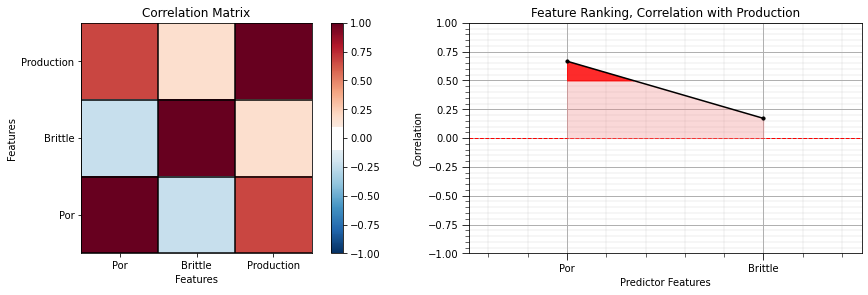

In [54]:
corr_matrix = df.corr()
correlation = corr_matrix.iloc[:,-1].values[:-1]

plt.subplot(121)
plot_corr(corr_matrix,'Correlation Matrix',1.0,0.1)           # using our correlation matrix visualization function
plt.xlabel('Features'); plt.ylabel('Features')

plt.subplot(122)
feature_rank_plot(Xname,correlation,-1.0,1.0,0.0,'Feature Ranking, Correlation with ' + yname,'Correlation',0.5)

plt.subplots_adjust(left=0.0, bottom=0.0, right=2.0, top=0.8, wspace=0.2, hspace=0.3); plt.show()

Note the 1.0 diagonal resulting from the correlation of each variable with themselves.  

This looks good.  There is a mix of correlation magnitudes. Of course, correlation coefficients are limited to degree of linear correlations.  

* Let's look at the matrix scatter plot to see the pairwise relationship between the features.

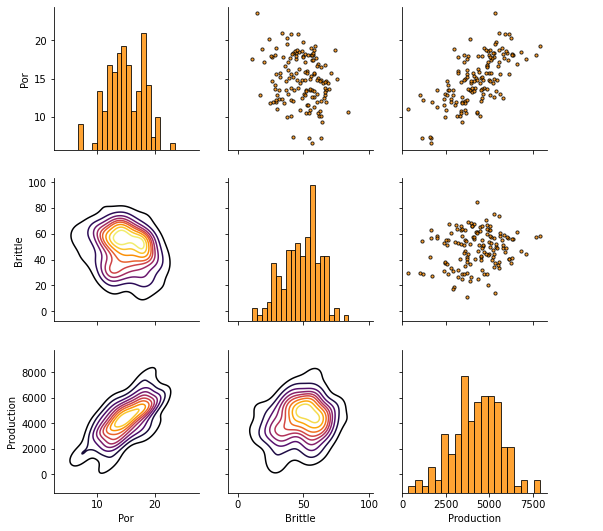

In [55]:
pairgrid = sns.PairGrid(df,vars=Xname+[yname])                # matrix scatter plots
pairgrid = pairgrid.map_upper(plt.scatter, color = 'darkorange', edgecolor = 'black', alpha = 0.8, s = 10)
pairgrid = pairgrid.map_diag(plt.hist, bins = 20, color = 'darkorange',alpha = 0.8, edgecolor = 'k')# Map a density plot to the lower triangle
pairgrid = pairgrid.map_lower(sns.kdeplot, cmap = plt.cm.inferno, 
                              alpha = 1.0, n_levels = 10)
pairgrid.add_legend()
plt.subplots_adjust(left=0.0, bottom=0.0, right=0.9, top=0.9, wspace=0.2, hspace=0.2); plt.show()

#### Train and Test Split

For convenience and simplicity we use scikit-learn's random train and test split.

In [56]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25,random_state=73073) # train and test split
df_train = pd.concat([X_train,y_train],axis=1)                # make one train DataFrame with both X and y (remove all other features)
df_test = pd.concat([X_test,y_test],axis=1)                   # make one testin DataFrame with both X and y (remove all other features)

#### Visualize the DataFrame

Visualizing the train and test DataFrame is useful check before we build our models.

* many things can go wrong, e.g., we loaded the wrong data, all the features did not load, etc.

We can preview by utilizing the 'head' DataFrame member function (with a nice and clean format, see below). 

In [57]:
print('       Training DataFrame          Testing DataFrame')
display_sidebyside(df_train,df_test)                          # custom function for side-by-side DataFrame display

       Training DataFrame          Testing DataFrame


,Por,Brittle,Production
86,12.83,29.87,995.700671
35,17.39,56.43,6060.760806
75,12.23,40.67,3744.177137
36,13.72,40.24,4203.470533
126,12.83,17.20,2917.165695
,Por,Brittle,Production
5,15.55,58.25,5619.930037
46,20.21,23.78,3897.440411
96,15.07,39.39,4504.608029
45,12.10,63.24,3613.953926


#### Summary Statistics for Tabular Data

There are a lot of efficient methods to calculate summary statistics from tabular data in DataFrames. 

* The describe command provides count, mean, minimum, maximum in a nice data table. 

In [58]:
print('            Training DataFrame                      Testing DataFrame')    # custom function for side-by-side summary statistics
display_sidebyside(df_train.describe().loc[['count', 'mean', 'std', 'min', 'max']],df_test.describe().loc[['count', 'mean', 'std', 'min', 'max']])

            Training DataFrame                      Testing DataFrame


,Por,Brittle,Production
count,105.000000,105.000000,105.000000
mean,14.859238,48.861143,4192.479746
std,3.057228,14.432050,1347.391355
min,7.220000,10.940000,357.449794
max,23.550000,84.330000,7934.478879
,Por,Brittle,Production
count,35.000000,35.000000,35.000000
mean,15.011714,46.798286,4431.830496
std,3.574467,13.380910,1487.184992
min,6.550000,20.120000,1572.738774


It is good that we checked the summary statistics.

* there are no obvious issues
* check out the range of values for each feature to set up and adjust plotting limits. See above.

#### Visualize the Train and Test Splits

Let's check the consistency and coverage of training and testing with histograms and scatter plots.

* check to make sure the training and testing cover the range of possible feature combinations
* ensure we are not extrapolating beyond the training data with the testing cases

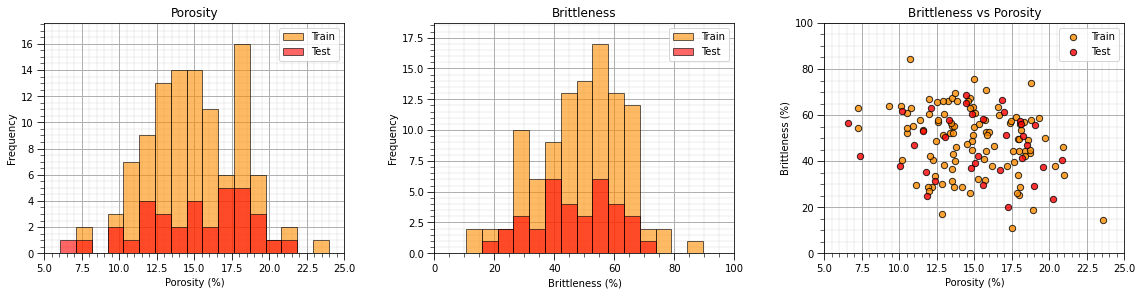

In [59]:
nbins = 20                                                    # number of histogram bins

plt.subplot(131)                                              # predictor feature #1 histogram
freq1,_,_ = plt.hist(x=df_train[Xname[0]],weights=None,bins=np.linspace(Xmin[0],Xmax[0],nbins),alpha = 0.6,
                     edgecolor='black',color='darkorange',density=False,label='Train')
freq2,_,_ = plt.hist(x=df_test[Xname[0]],weights=None,bins=np.linspace(Xmin[0],Xmax[0],nbins),alpha = 0.6,
                     edgecolor='black',color='red',density=False,label='Test')
max_freq = max(freq1.max()*1.10,freq2.max()*1.10)
plt.xlabel(Xlabelunit[0]); plt.ylabel('Frequency'); plt.ylim([0.0,max_freq]); plt.title(Xlabel[0]); add_grid()  
plt.xlim([Xmin[0],Xmax[0]]); plt.legend(loc='upper right')   

plt.subplot(132)                                              # predictor feature #2 histogram
freq1,_,_ = plt.hist(x=df_train[Xname[1]],weights=None,bins=np.linspace(Xmin[1],Xmax[1],nbins),alpha = 0.6,
                     edgecolor='black',color='darkorange',density=False,label='Train')
freq2,_,_ = plt.hist(x=df_test[Xname[1]],weights=None,bins=np.linspace(Xmin[1],Xmax[1],nbins),alpha = 0.6,
                     edgecolor='black',color='red',density=False,label='Test')
max_freq = max(freq1.max()*1.10,freq2.max()*1.10)
plt.xlabel(Xlabelunit[1]); plt.ylabel('Frequency'); plt.ylim([0.0,max_freq]); plt.title(Xlabel[1]); add_grid()  
plt.xlim([Xmin[1],Xmax[1]]); plt.legend(loc='upper right')   

plt.subplot(133)                                              # predictor features #1 and #2 scatter plot
plt.scatter(df_train[Xname[0]],df_train[Xname[1]],s=40,marker='o',color = 'darkorange',alpha = 0.8,edgecolor = 'black',zorder=10,label='Train')
plt.scatter(df_test[Xname[0]],df_test[Xname[1]],s=40,marker='o',color = 'red',alpha = 0.8,edgecolor = 'black',zorder=10,label='Test')
plt.title(Xlabel[1] + ' vs ' +  Xlabel[0])
plt.xlabel(Xlabelunit[0]); plt.ylabel(Xlabelunit[1])
plt.legend(); add_grid(); plt.xlim([Xmin[0],Xmax[0]]); plt.ylim([Xmin[1],Xmax[1]])

plt.subplots_adjust(left=0.0, bottom=0.0, right=2.5, top=0.8, wspace=0.3, hspace=0.2)
#plt.savefig('Test.pdf', dpi=600, bbox_inches = 'tight',format='pdf')   
plt.show()

Sometimes I find it more convenient to compare distributions by looking at CDF's instead of histograms.
* we avoid the arbitrary choice of histogram bin size, because CDF's are at the data resolution.

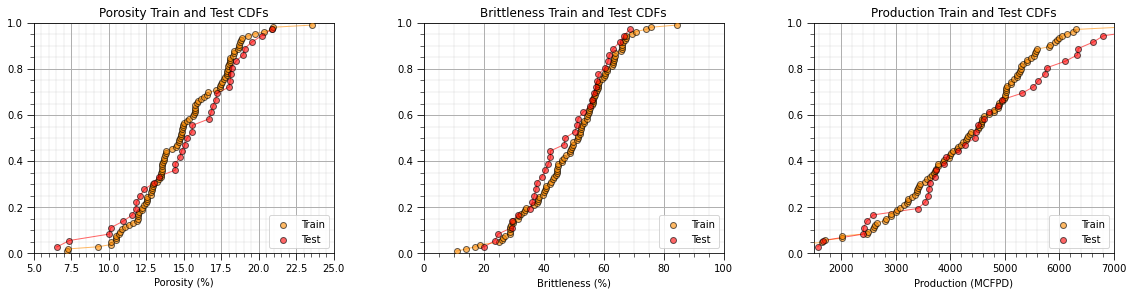

In [60]:
plt.subplot(131)                                              # predictor feature #1 CDF
plot_CDF(X_train[Xname[0]],'darkorange',alpha=0.6,lw=1,ls='solid',label='Train')
plot_CDF(X_test[Xname[0]],'red',alpha=0.6,lw=1,ls='solid',label='Test')
plt.xlabel(Xlabelunit[0]); plt.xlim(Xmin[0],Xmax[0]); plt.ylim([0,1]); add_grid(); plt.legend(loc='lower right')
plt.title(Xlabel[0] + ' Train and Test CDFs')

plt.subplot(132)                                              # predictor feature #2 CDF
plot_CDF(X_train[Xname[1]],'darkorange',alpha=0.6,lw=1,ls='solid',label='Train')
plot_CDF(X_test[Xname[1]],'red',alpha=0.6,lw=1,ls='solid',label='Test')
plt.xlabel(Xlabelunit[1]); plt.xlim(Xmin[1],Xmax[1]); plt.ylim([0,1]); add_grid(); plt.legend(loc='lower right')
plt.title(Xlabel[1] + ' Train and Test CDFs')

plt.subplot(133)                                              # response feature CDF
plot_CDF(y_train[yname],'darkorange',alpha=0.6,lw=1,ls='solid',label='Train')
plot_CDF(y_test[yname],'red',alpha=0.6,lw=1,ls='solid',label='Test')
plt.xlabel(ylabelunit); plt.xlim(ymin,ymax); plt.ylim([0,1]); add_grid(); plt.legend(loc='lower right')
plt.title(ylabel + ' Train and Test CDFs')

plt.subplots_adjust(left=0.0, bottom=0.0, right=2.5, top=0.8, wspace=0.3, hspace=0.2)
#plt.savefig('Test.pdf', dpi=600, bbox_inches = 'tight',format='pdf')   
plt.show()

Once again, the distributions are well behaved, 

* we cannot observe obvious gaps nor truncations.
* check coverage of the train and test data

Let's look at a scatter plot of Porosity vs. Brittleness with points colored by Production.

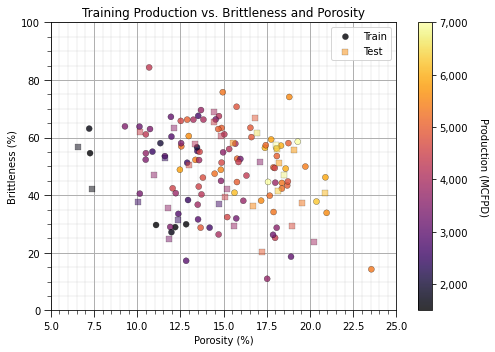

In [61]:
plt.subplot(111)                                              # visualize the train and test data in predictor feature space
im = plt.scatter(X_train[Xname[0]],X_train[Xname[1]],s=None, c=y_train[yname], marker='o', cmap=cmap, 
    norm=None, vmin=ymin, vmax=ymax, alpha=0.8, linewidths=0.3, edgecolors="black", label = 'Train')
plt.scatter(X_test[Xname[0]],X_test[Xname[1]],s=None, c=y_test[yname], marker='s', cmap=cmap, 
    norm=None, vmin=ymin, vmax=ymax, alpha=0.5, linewidths=0.3, edgecolors="black", label = 'Test')
plt.title('Training ' + ylabel + ' vs. ' + Xlabel[1] + ' and ' + Xlabel[0]); 
plt.xlabel(Xlabel[0] + ' (' + Xunit[0] + ')'); plt.ylabel(Xlabel[1] + ' (' + Xunit[1] + ')')
plt.xlim(Xmin[0],Xmax[0]); plt.ylim(Xmin[1],Xmax[1]); plt.legend(loc = 'upper right'); add_grid()
cbar = plt.colorbar(im, orientation = 'vertical')
cbar.set_label(ylabel + ' (' + yunit + ')', rotation=270, labelpad=20)
cbar.ax.yaxis.set_major_formatter(FuncFormatter(comma_format))

plt.subplots_adjust(left=0.0, bottom=0.0, right=1.0, top=1.0, wspace=0.2, hspace=0.2); plt.show()

#### Tree-based Boosting

To perform tree-based boosting, gradient boosting tree regression we:

1. set the hyperparameters for our model

```python
params = {
    'loss': 'squared_error'                                 # L2 Norm - least squares
    'n_estimators': 1,                                      # number of trees
    'max_depth': 1,                                         # maximum depth per tree
    'learning_rate': 1,                                     
    'criterion': 'squared_error'                            # tree construction criterion
}
```

2. instantiate the model

```python
boost_tree = GradientBoostingRegressor(**params)

```

3. train the model

```python
boot_tree.fit(X = predictors, y = response)
```

6. visualize the model result over the feature space (easy to do as we have only 2 predictor features)

#### Demonstration of Boosting

For demonstration let's set tree maximum depth to 1 and 6 tree-based boosting regression trees.  

* each tree only has a single split, called decision stumps. This will prevent interaction between the predictor features and be highly interpretable

You should be able to observe the additive nature of the trees, see the first tree and then the first plus the second tree and so on.

* recall the estimate is the summation of multiple trees

* since we are working with fitting a gradient after the first tree, we can have negative and positive estimates 

* in this example we can see some production estimates that are actually negative

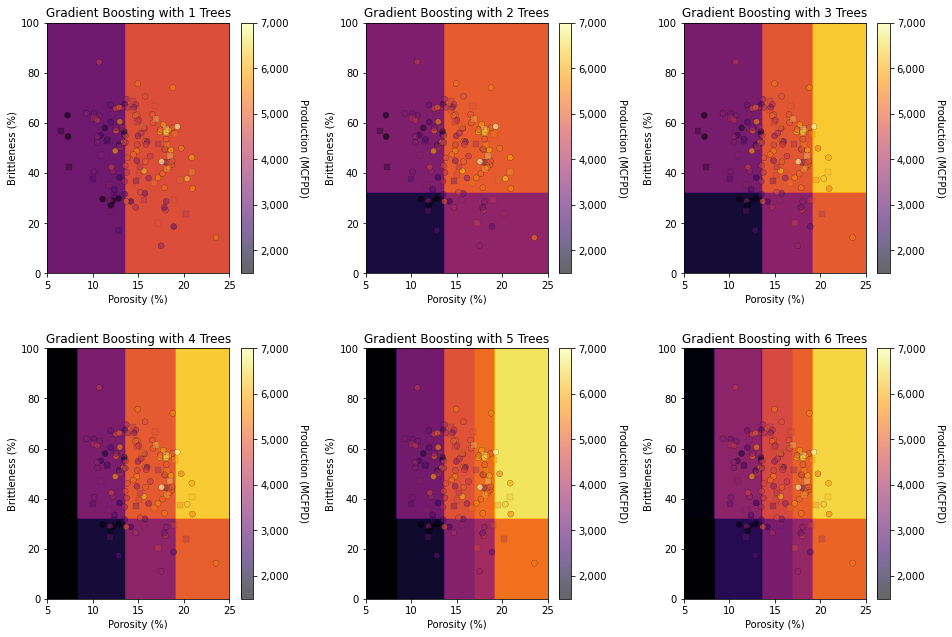

In [63]:
params = {
    'loss': 'squared_error',                                           # L2 Norm - least squares
    'max_depth': 1,                       
    'learning_rate': 1.0,
    'criterion': 'squared_error'                                      # tree construction criteria is mean square error over training
}
                                           
num_trees = np.linspace(1,6,6)                              # build a list of numbers of trees 
boosting_models = []; score = []; pred = []                 # arrays for storage of models and model summaries

index = 1
for num_tree in num_trees:                                  # loop over number of trees
    boosting_models.append(GradientBoostingRegressor(n_estimators=int(num_tree),**params))
    boosting_models[index-1].fit(X = X_train, y = y_train)
    score.append(boosting_models[index-1].score(X = X_test, y = y_test))
    plt.subplot(2,3,index)
    pred.append(visualize_model(boosting_models[index-1],X_train[Xname[0]],X_test[Xname[0]],X_train[Xname[1]],X_test[Xname[1]],Xmin,Xmax,
        y_train[yname],y_test[yname],ymin,ymax,'Gradient Boosting with ' + str(int(num_tree)) + ' Trees',Xname,yname,Xlabelunit,ylabelunit))
    index = index + 1
    
plt.subplots_adjust(left=0.0, bottom=0.0, right=2.0, top=2.0, wspace=0.4, hspace=0.3); plt.show()

Notice that there is significant misfit with the data 

* we have only used up to 6 decision stumps (1 decision tree) 

Let's check the cross validation results with the withheld testing data.

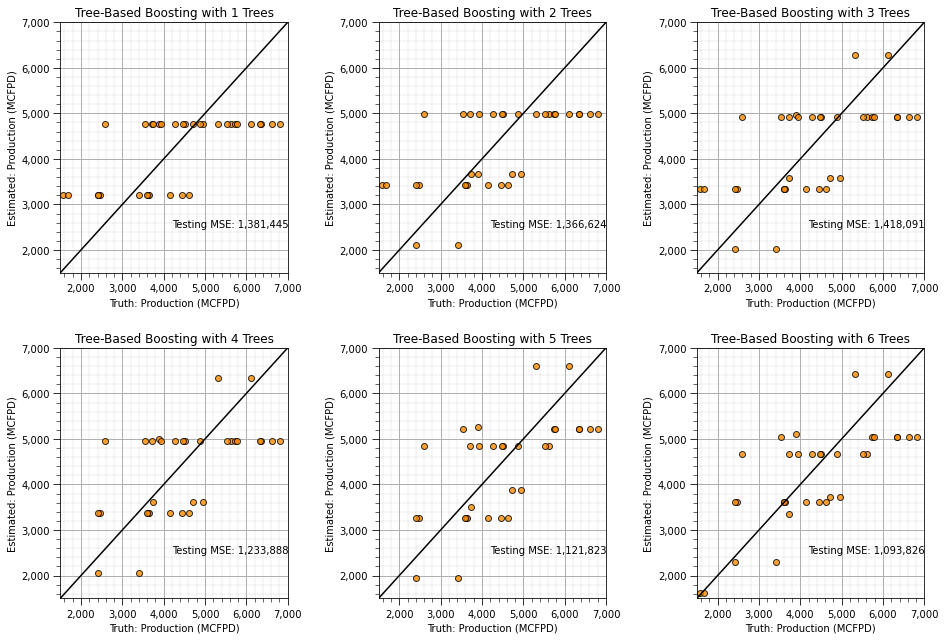

In [64]:
index = 1
for num_tree in num_trees:                                  # check over number of trees
    plt.subplot(2,3,index)
    check_model(boosting_models[index-1],X_test,y_test,ymin,ymax,ylabelunit,'Tree-Based Boosting with ' + str(int(num_tree)) + ' Trees')
    index = index + 1
plt.subplots_adjust(left=0.0, bottom=0.0, right=2.0, top=2.0, wspace=0.4, hspace=0.3)

Of course with a single tree we do quite poorly, but by the time we get to 6 stump trees we cut the MSE almost in half.

#### Time to Build More Trees

Now let's demonstrate the result of utilizing many more trees in our tree-based boosting model.

* we will still work with simple decision stumps, don't worry we will add more later

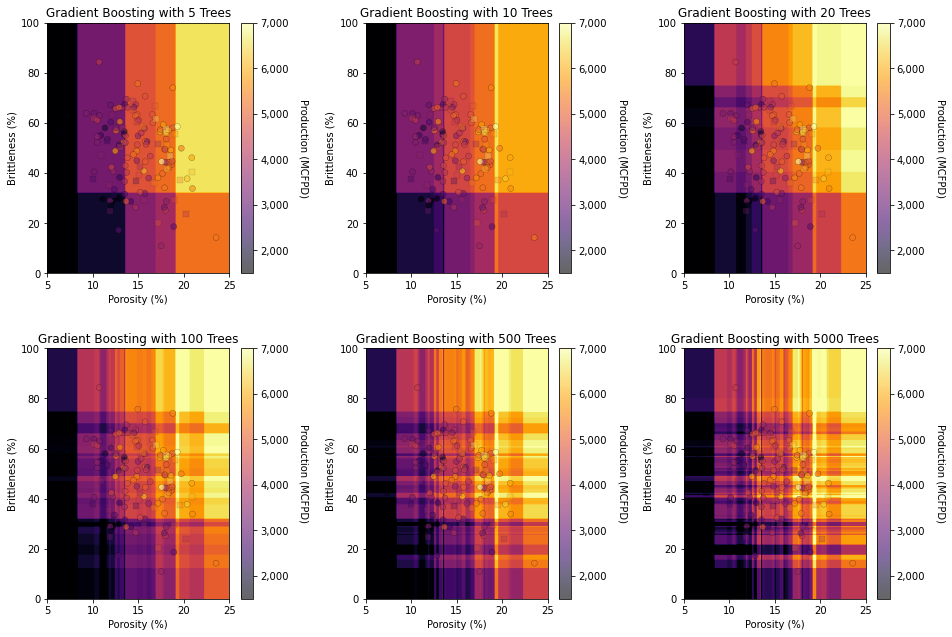

In [65]:
params = {
    'loss': 'squared_error',                                           # L2 Norm - least squares
    'max_depth': 1,                                         # maximum depth per tree
    'learning_rate': 1,
    'criterion': 'squared_error'                                      # tree construction criteria is mean square error over training
}
    
num_trees = [5,10,20,100,500,5000]                          # build a list of numbers of trees 
boosting_models = []; score = []; pred = []                 # arrays for storage of models and model summaries

index = 1
for num_tree in num_trees:                                  # loop over number of trees
    boosting_models.append(GradientBoostingRegressor(n_estimators=int(num_tree),**params))
    boosting_models[index-1].fit(X = X_train, y = y_train)
    score.append(boosting_models[index-1].score(X = X_test, y = y_test))
    plt.subplot(2,3,index)
    pred.append(visualize_model(boosting_models[index-1],X_train[Xname[0]],X_test[Xname[0]],X_train[Xname[1]],X_test[Xname[1]],Xmin,Xmax,
        y_train[yname],y_test[yname],ymin,ymax,'Gradient Boosting with ' + str(int(num_tree)) + ' Trees',Xname,yname,Xlabelunit,ylabelunit))
    index = index + 1

plt.subplots_adjust(left=0.0, bottom=0.0, right=2.0, top=2.0, wspace=0.4, hspace=0.3)

See the plaid pattern? It is due to the use of decision stumps, and:

* an additive model
* all models contribute to all predictions

See the dark and bright regions?

* the additive model may extrapolate outside the data range

Let's cross validate with our testing data to see how our model has improved with more trees.

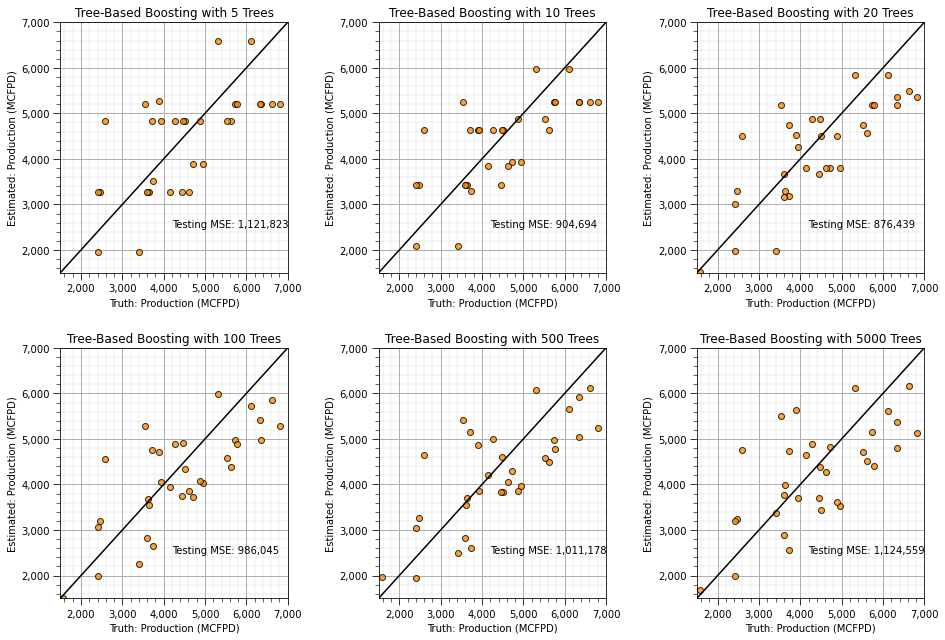

In [37]:
index = 1
for num_tree in num_trees:                                  # check over number of trees
    plt.subplot(2,3,index)
    check_model(boosting_models[index-1],X_test,y_test,ymin,ymax,ylabelunit,'Tree-Based Boosting with ' + str(int(num_tree)) + ' Trees')
    index = index + 1
plt.subplots_adjust(left=0.0, bottom=0.0, right=2.0, top=2.0, wspace=0.4, hspace=0.3)

Around 20 trees we get our best performance and then we start to degrade, we are likely starting to overfit the training data.

#### Going Beyond Decision Stumps

As state before with decision stumps we prevent interactions between features.

Let's extend to tree depth of 2

* two nested decisions resulting in 4 terminal nodes

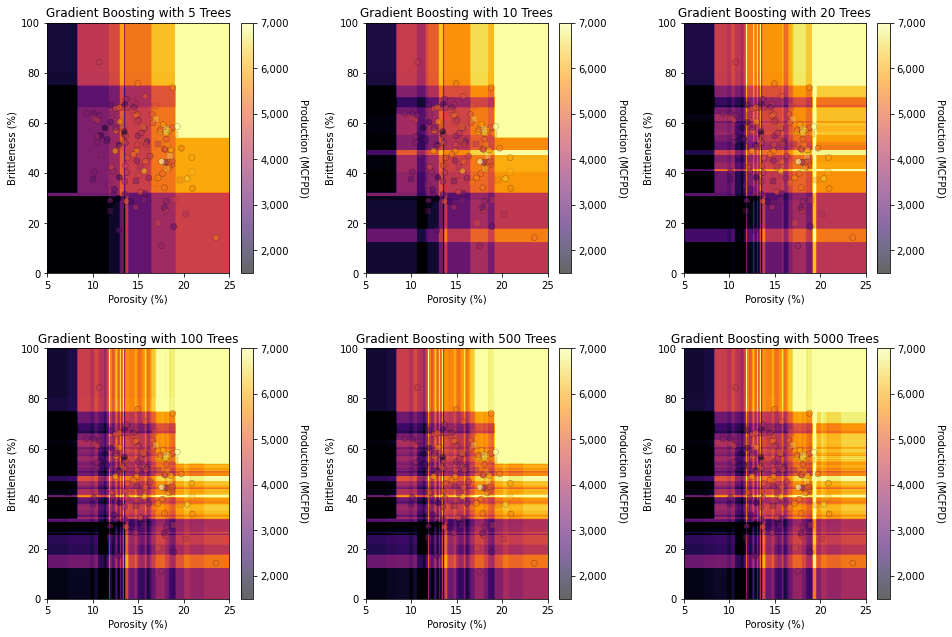

In [38]:
params = {
    'loss': 'squared_error',                                           # L2 Norm - least squares
    'max_depth': 2,                                         # maximum depth per tree
    'learning_rate': 1,
    'criterion': 'squared_error'                                      # tree construction criteria is mean square error over training
}
    
num_trees = [5,10,20,100,500,5000]                          # build a list of numbers of trees 
boosting_models = []; score = []; pred = []                 # arrays for storage of models and model summaries

index = 1
for num_tree in num_trees:                                  # loop over number of trees
    boosting_models.append(GradientBoostingRegressor(n_estimators=int(num_tree),**params))
    boosting_models[index-1].fit(X = X_train, y = y_train)
    score.append(boosting_models[index-1].score(X = X_test, y = y_test))
    plt.subplot(2,3,index)
    pred.append(visualize_model(boosting_models[index-1],X_train[Xname[0]],X_test[Xname[0]],X_train[Xname[1]],X_test[Xname[1]],Xmin,Xmax,
        y_train[yname],y_test[yname],ymin,ymax,'Gradient Boosting with ' + str(int(num_tree)) + ' Trees',Xname,yname,Xlabelunit,ylabelunit))
    index = index + 1

plt.subplots_adjust(left=0.0, bottom=0.0, right=2.0, top=2.0, wspace=0.4, hspace=0.3)

We have much more flexibility now.  

* with one tree we have 4 terminal nodes (regions)
* with only 6 trees we are capturing some complicate features

Let's increase the tree depth one more time.

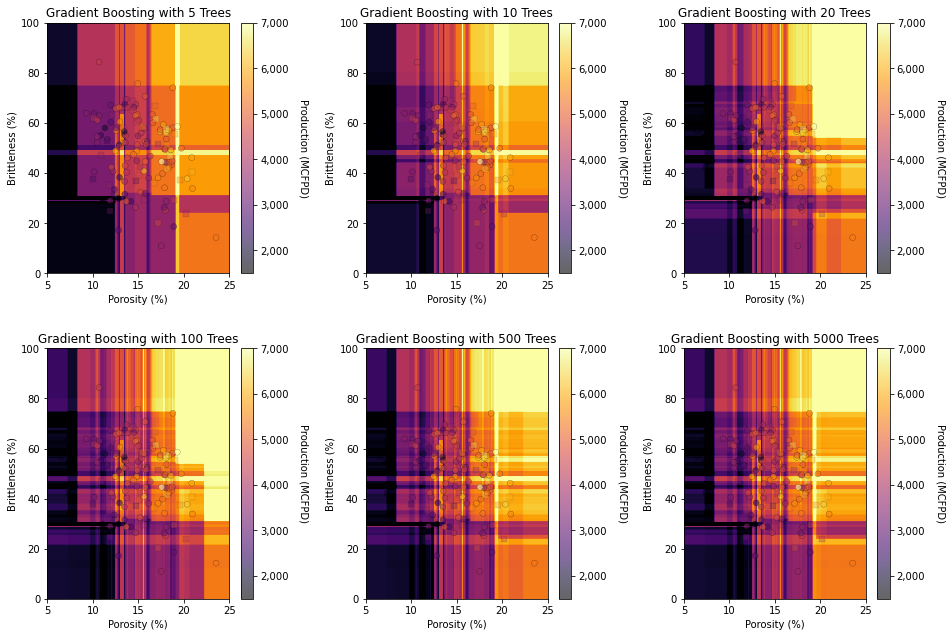

In [39]:
params = {
    'loss': 'squared_error',                                           # L2 Norm - least squares
    'max_depth': 3,                                         # maximum depth per tree
    'learning_rate': 1,
    'criterion': 'squared_error'                                      # tree construction criteria is mean square error over training
}
    
num_trees = [5,10,20,100,500,5000]                          # build a list of numbers of trees 
boosting_models = []; score = []; pred = []                 # arrays for storage of models and model summaries

index = 1
for num_tree in num_trees:                                  # loop over number of trees
    boosting_models.append(GradientBoostingRegressor(n_estimators=int(num_tree),**params))
    boosting_models[index-1].fit(X = X_train, y = y_train)
    score.append(boosting_models[index-1].score(X = X_test, y = y_test))
    plt.subplot(2,3,index)
    pred.append(visualize_model(boosting_models[index-1],X_train[Xname[0]],X_test[Xname[0]],X_train[Xname[1]],X_test[Xname[1]],Xmin,Xmax,
        y_train[yname],y_test[yname],ymin,ymax,'Gradient Boosting with ' + str(int(num_tree)) + ' Trees',Xname,yname,Xlabelunit,ylabelunit))
    index = index + 1

plt.subplots_adjust(left=0.0, bottom=0.0, right=2.0, top=2.0, wspace=0.4, hspace=0.3)

One more time, it is common to use trees with depths of 4-8, so let's try 5.

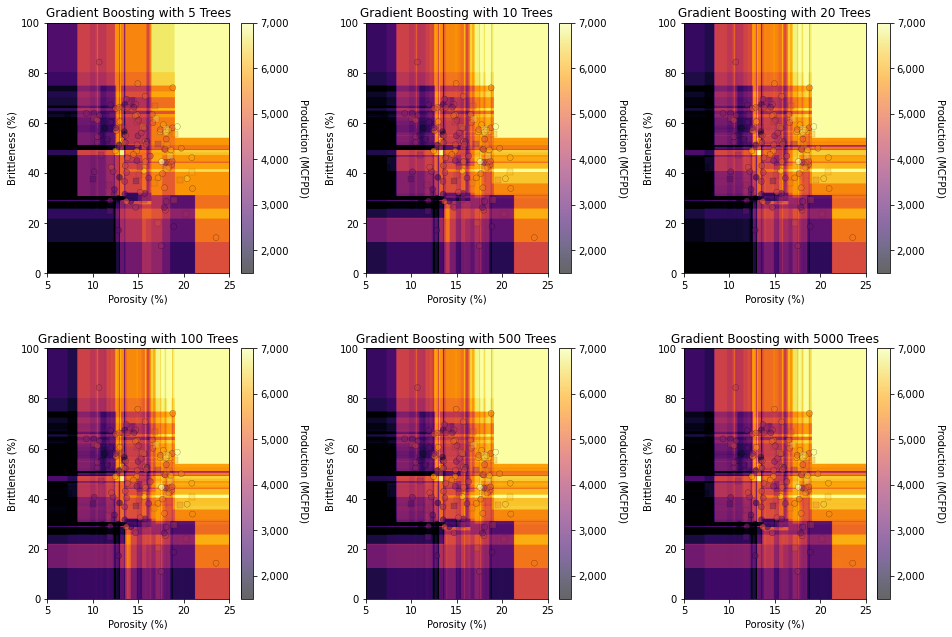

In [40]:
params = {
    'loss': 'squared_error',                                           # L2 Norm - least squares
    'max_depth': 5,                                         # maximum depth per tree
    'learning_rate': 1,
    'criterion': 'squared_error'                                      # tree construction criteria is mean square error over training
}
    
num_trees = [5,10,20,100,500,5000]                          # build a list of numbers of trees 
boosting_models = []; score = []; pred = []                 # arrays for storage of models and model summaries

index = 1
for num_tree in num_trees:                                  # loop over number of trees
    boosting_models.append(GradientBoostingRegressor(n_estimators=int(num_tree),**params))
    boosting_models[index-1].fit(X = X_train, y = y_train)
    score.append(boosting_models[index-1].score(X = X_test, y = y_test))
    plt.subplot(2,3,index)
    pred.append(visualize_model(boosting_models[index-1],X_train[Xname[0]],X_test[Xname[0]],X_train[Xname[1]],X_test[Xname[1]],Xmin,Xmax,
        y_train[yname],y_test[yname],ymin,ymax,'Gradient Boosting with ' + str(int(num_tree)) + ' Trees',Xname,yname,Xlabelunit,ylabelunit))
    index = index + 1

plt.subplots_adjust(left=0.0, bottom=0.0, right=2.0, top=2.0, wspace=0.4, hspace=0.3)

Let's cross validate the model with testing data.

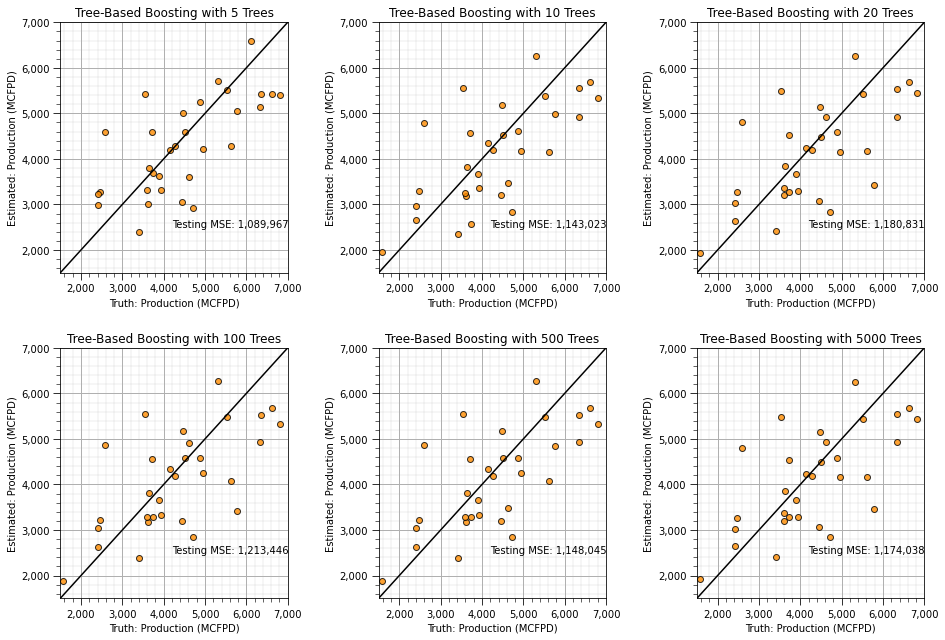

In [41]:
index = 1
for num_tree in num_trees:                                  # check over number of trees
    plt.subplot(2,3,index)
    check_model(boosting_models[index-1],X_test,y_test,ymin,ymax,ylabelunit,'Tree-Based Boosting with ' + str(int(num_tree)) + ' Trees')
    index = index + 1
plt.subplots_adjust(left=0.0, bottom=0.0, right=2.0, top=2.0, wspace=0.4, hspace=0.3)

With a max tree depth of 5 our model performance peaks early and the addition of more trees has no impact.

* of course this is not a thorough analysis

Let's try something more thorough

* we will cross validate models with $1,\ldots,100$ trees with max tree depths of $1, 2, 3, 10$.
* we also slow down the learning rate, I increased it above to amplify the difference of the outputs for demonstration, but know we want to see the best possible model.

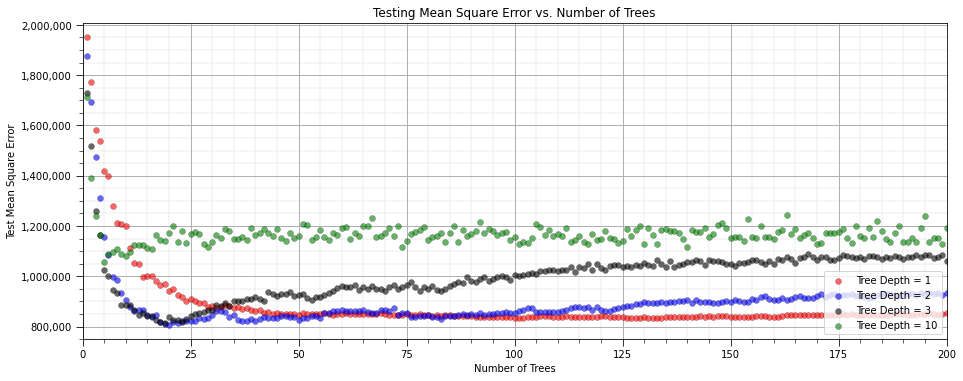

In [44]:
num_trees = np.linspace(1,200,200)
max_features = 1
MSE1_list = []; MSE2_list = []; MSE3_list = []; MSE4_list = [] 

params1 = {
    'loss': 'squared_error',                                           # L2 Norm - least squares
    'max_depth': 1,                                         # maximum depth per tree
    'learning_rate': 0.2,
    'criterion': 'squared_error'                                      # tree construction criteria is mean square error over training
}

params2 = {
    'loss': 'squared_error',                                           # L2 Norm - least squares
    'max_depth': 2,                                         # maximum depth per tree
    'learning_rate': 0.2,
    'criterion': 'squared_error'                                      # tree construction criteria is mean square error over training
}

params3 = {
    'loss': 'squared_error',                                           # L2 Norm - least squares
    'max_depth': 3,                                         # maximum depth per tree
    'learning_rate': 0.2,
    'criterion': 'squared_error'                                      # tree construction criteria is mean square error over training
}

params4 = {
    'loss': 'squared_error',                                           # L2 Norm - least squares
    'max_depth': 10,                                        # maximum depth per tree
    'learning_rate': 0.2,
    'criterion': 'squared_error'                                      # tree construction criteria is mean square error over training
}

index = 1
for num_tree in num_trees:                                  # loop over number of trees in our random forest
    boosting_model1 = GradientBoostingRegressor(n_estimators=int(num_tree),**params1).fit(X = X_train, y = y_train)
    y_test1_hat = boosting_model1.predict(X_test); MSE1_list.append(metrics.mean_squared_error(y_test,y_test1_hat))
    
    boosting_model2 = GradientBoostingRegressor(n_estimators=int(num_tree),**params2).fit(X = X_train, y = y_train)
    y_test2_hat = boosting_model2.predict(X_test); MSE2_list.append(metrics.mean_squared_error(y_test,y_test2_hat))

    boosting_model3 = GradientBoostingRegressor(n_estimators=int(num_tree),**params3).fit(X = X_train, y = y_train)
    y_test3_hat = boosting_model3.predict(X_test); MSE3_list.append(metrics.mean_squared_error(y_test,y_test3_hat))

    boosting_model4 = GradientBoostingRegressor(n_estimators=int(num_tree),**params4).fit(X = X_train, y = y_train)
    y_test4_hat = boosting_model4.predict(X_test); MSE4_list.append(metrics.mean_squared_error(y_test,y_test4_hat))

    index = index + 1
    
plt.subplot(111)                                            # plot jackknife results for all cases
plt.scatter(num_trees,MSE1_list,s=None,c='red',marker=None,cmap=None,norm=None,vmin=None,vmax=None,alpha=0.6,
            linewidths=0.3,edgecolors="black",label = "Tree Depth = 1")
plt.scatter(num_trees,MSE2_list,s=None,c='blue',marker=None,cmap=None,norm=None,vmin=None,vmax=None,alpha=0.6,
            linewidths=0.3,edgecolors="black",label = "Tree Depth = 2")
plt.scatter(num_trees,MSE3_list,s=None,c='black',marker=None,cmap=None,norm=None,vmin=None,vmax=None,alpha=0.6,
            linewidths=0.3,edgecolors="black",label = "Tree Depth = 3")
plt.scatter(num_trees,MSE4_list,s=None,c='green',marker=None,cmap=None,norm=None,vmin=None,vmax=None,alpha=0.6,
            linewidths=0.3,edgecolors="black",label = "Tree Depth = 10")

plt.title('Testing Mean Square Error vs. Number of Trees'); plt.xlabel('Number of Trees'); plt.ylabel('Test Mean Square Error')
plt.xlim(0,200); plt.legend(loc='lower right'); add_grid()
plt.gca().yaxis.set_major_formatter(FuncFormatter(comma_format))

plt.subplots_adjust(left=0.0, bottom=0.0, right=2.0, top=1.1, wspace=0.2, hspace=0.2); plt.show()

That's interesting:

* with increasing tree depths our model may improve

* more tree depth requires fewer trees for improved accuracy

* with tree depths of 2 and 3 the models behave the same and after 10-15 trees level off, they are resistant to overfit

* with tree depth of 10, the number of trees has no impact of model performance

#### Gradient Descent Hyperparameters

The learning rate scales the additive impact of each additive tree to the overall model prediction.

* lower learning rate will slow the convergence to a solution
* lower learning rate will help us not skip over an optimum solution

We won't spend much time on this, but let's just try changing the learning rate.

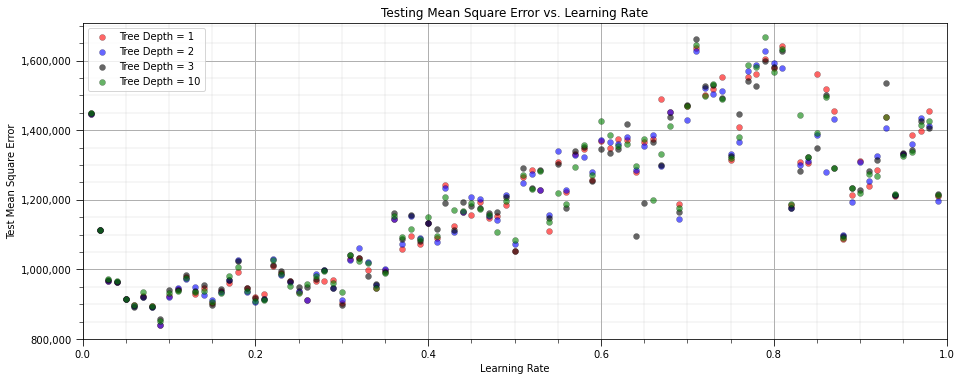

In [47]:
learning_rates = np.arange(0.01,1.0,0.01)
MSE1_list = []; MSE2_list = []; MSE3_list = []; MSE4_list = [] 

params1 = {
    'loss': 'squared_error',                                           # L2 Norm - least squares
    'max_depth': 5,                                         # maximum depth per tree
    'n_estimators': 40,
    'criterion': 'squared_error'                                      # tree construction criteria is mean square error over training
}

params2 = {
    'loss': 'squared_error',                                           # L2 Norm - least squares
    'max_depth': 5,                                         # maximum depth per tree
    'n_estimators': 40,
    'criterion': 'squared_error'                                      # tree construction criteria is mean square error over training
}

params3 = {
    'loss': 'squared_error',                                           # L2 Norm - least squares
    'max_depth': 5,                                         # maximum depth per tree
    'n_estimators': 40,
    'criterion': 'squared_error'                                      # tree construction criteria is mean square error over training
}

params4 = {
    'loss': 'squared_error',                                           # L2 Norm - least squares
    'max_depth': 5,                                        # maximum depth per tree
    'n_estimators': 40,
    'criterion': 'squared_error'                                      # tree construction criteria is mean square error over training
}

index = 1
for learning_rate in learning_rates:                                  # loop over number of trees in our random forest
    boosting_model1 = GradientBoostingRegressor(learning_rate = learning_rate,**params1).fit(X = X_train, y = y_train)
    y_test1_hat = boosting_model1.predict(X_test); MSE1_list.append(metrics.mean_squared_error(y_test,y_test1_hat))
    
    boosting_model2 = GradientBoostingRegressor(learning_rate = learning_rate,**params2).fit(X = X_train, y = y_train)
    y_test2_hat = boosting_model2.predict(X_test); MSE2_list.append(metrics.mean_squared_error(y_test,y_test2_hat))

    boosting_model3 = GradientBoostingRegressor(learning_rate = learning_rate,**params3).fit(X = X_train, y = y_train)
    y_test3_hat = boosting_model3.predict(X_test); MSE3_list.append(metrics.mean_squared_error(y_test,y_test3_hat))

    boosting_model4 = GradientBoostingRegressor(learning_rate = learning_rate,**params4).fit(X = X_train, y = y_train)
    y_test4_hat = boosting_model4.predict(X_test); MSE4_list.append(metrics.mean_squared_error(y_test,y_test4_hat))

    index = index + 1
    
plt.subplot(111)                                            # plot jackknife results for all cases
plt.scatter(learning_rates,MSE1_list,s=None,c='red',marker=None,cmap=None,norm=None,vmin=None,vmax=None,alpha=0.6,
            linewidths=0.3,edgecolors="black",label = "Tree Depth = 1")
plt.scatter(learning_rates,MSE2_list,s=None,c='blue',marker=None,cmap=None,norm=None,vmin=None,vmax=None,alpha=0.6,
            linewidths=0.3,edgecolors="black",label = "Tree Depth = 2")
plt.scatter(learning_rates,MSE3_list,s=None,c='black',marker=None,cmap=None,norm=None,vmin=None,vmax=None,alpha=0.6,
            linewidths=0.3,edgecolors="black",label = "Tree Depth = 3")
plt.scatter(learning_rates,MSE4_list,s=None,c='green',marker=None,cmap=None,norm=None,vmin=None,vmax=None,alpha=0.6,
            linewidths=0.3,edgecolors="black",label = "Tree Depth = 10")

plt.title('Testing Mean Square Error vs. Learning Rate'); plt.xlabel('Learning Rate'); plt.ylabel('Test Mean Square Error')
plt.xlim(0.0,1.0); plt.legend(loc='upper left'); add_grid()
plt.gca().yaxis.set_major_formatter(FuncFormatter(comma_format))

plt.subplots_adjust(left=0.0, bottom=0.0, right=2.0, top=1.1, wspace=0.2, hspace=0.2); plt.show()

Once again, a very interesting result.

* regardless of tree complexity, it is better to learn slowly!

#### Machine Learning Pipelines for Clean, Compact Machine Learning Code

Pipelines are a scikit-learn class that allows for the encapsulation of a sequence of data preparation and modeling steps

* then we can treat the pipeline as an object in our much condensed workflow

The pipeline class allows us to:

* improve code readability and to keep everything straight

* build complete workflows with very few lines of readable code 

* avoid common workflow problems like data leakage, testing data informing model parameter training 

* abstract common machine learning modeling and focus on building the best model possible

The fundamental philosophy is to treat machine learning as a combinatorial search to find the best model (AutoML)

For more information see my recorded lecture on [Machine Learning Pipelines](https://www.youtube.com/watch?v=tYrPs8s1l9U&list=PLG19vXLQHvSAufDFgZEFAYQEwMJXklnQV&index=5) and a well-documented demonstration [Machine Learning Pipeline Workflow](http://localhost:8892/notebooks/OneDrive%20-%20The%20University%20of%20Texas%20at%20Austin/Courses/Workflows/PythonDataBasics_Pipelines.ipynb).

In [48]:
x1 = 0.25; x2 = 0.3                                           # predictor values for the prediction

pipe_boosting = Pipeline([                                      # the machine learning workflow as a pipeline object
    ('boosting', GradientBoostingRegressor())
])

params = {                                                    # the machine learning workflow method's parameters to search
    'boosting__learning_rate': np.arange(0.1,2.0,0.2),
    'boosting__n_estimators': np.arange(2,40,4,dtype = int),
}

tuned_boosting = GridSearchCV(pipe_boosting,params,scoring = 'neg_mean_squared_error', # hyperparameter tuning w. grid search k-fold cross validation 
                             refit = True)
tuned_boosting.fit(X,y)                                         # tune the model with k-fold and then train the model will the data 

print('Tuned hyperparameter: ' + str(tuned_boosting.best_params_))

estimate = tuned_boosting.predict([[x1,x2]])[0]                 # make a prediction (no tuning shown)
print('Estimated ' + ylabel + ' for ' + Xlabel[0] + ' = ' + str(x1) + ' and ' + Xlabel[1] + ' = ' + str(x2)  + ' is ' + 
      str(round(estimate,1)) + ' ' + yunit)                     # print results

Tuned hyperparameter: {'boosting__learning_rate': 0.1, 'boosting__n_estimators': 22}
Estimated Production for Porosity = 0.25 and Brittleness = 0.3 is 1961.5 MCFPD


#### Comments

I hope you found this chapter helpful. Much more could be done and discussed, I have many more resources. Check out my [shared resource inventory](https://michaelpyrcz.com/my-resources),

*Michael*

#### The Author:

Michael Pyrcz, Professor, The University of Texas at Austin 
*Novel Data Analytics, Geostatistics and Machine Learning Subsurface Solutions*

With over 17 years of experience in subsurface consulting, research and development, Michael has returned to academia driven by his passion for teaching and enthusiasm for enhancing engineers' and geoscientists' impact in subsurface resource development. 

For more about Michael check out these links:

[Twitter](https://twitter.com/geostatsguy) | [GitHub](https://github.com/GeostatsGuy) | [Website](http://michaelpyrcz.com) | [GoogleScholar](https://scholar.google.com/citations?user=QVZ20eQAAAAJ&hl=en&oi=ao) | [Book](https://www.amazon.com/Geostatistical-Reservoir-Modeling-Michael-Pyrcz/dp/0199731446) | [YouTube](https://www.youtube.com/channel/UCLqEr-xV-ceHdXXXrTId5ig) | [Applied Geostats in Python e-book](https://geostatsguy.github.io/GeostatsPyDemos_Book/intro.html) | [LinkedIn](https://www.linkedin.com/in/michael-pyrcz-61a648a1)

#### Want to Work Together?

I hope this content is helpful to those that want to learn more about subsurface modeling, data analytics and machine learning. Students and working professionals are welcome to participate.

* Want to invite me to visit your company for training, mentoring, project review, workflow design and / or consulting? I'd be happy to drop by and work with you! 

* Interested in partnering, supporting my graduate student research or my Subsurface Data Analytics and Machine Learning consortium (co-PI is Professor John Foster)? My research combines data analytics, stochastic modeling and machine learning theory with practice to develop novel methods and workflows to add value. We are solving challenging subsurface problems!

* I can be reached at mpyrcz@austin.utexas.edu.

I'm always happy to discuss,

*Michael*

Michael Pyrcz, Ph.D., P.Eng. Professor, Cockrell School of Engineering and The Jackson School of Geosciences, The University of Texas at Austin

#### More Resources Available at: [Twitter](https://twitter.com/geostatsguy) | [GitHub](https://github.com/GeostatsGuy) | [Website](http://michaelpyrcz.com) | [GoogleScholar](https://scholar.google.com/citations?user=QVZ20eQAAAAJ&hl=en&oi=ao) | [Book](https://www.amazon.com/Geostatistical-Reservoir-Modeling-Michael-Pyrcz/dp/0199731446) | [YouTube](https://www.youtube.com/channel/UCLqEr-xV-ceHdXXXrTId5ig)  | [Applied Geostats in Python e-book](https://geostatsguy.github.io/GeostatsPyDemos_Book/intro.html) | [LinkedIn](https://www.linkedin.com/in/michael-pyrcz-61a648a1)  